In [1]:
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from scipy.ndimage import generate_binary_structure
from scipy import ndimage

import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

In [2]:
# generalized disk as SE

def disk(r):
    x = np.arange(-r, r+1, 1)
    xx,yy = np.meshgrid(x,x)
    d = np.sqrt(xx**2 + yy**2)
    return d<=r

In [3]:
B = imread('B.bmp')
# image read as integer

B = B>100
# now is bool


# my SEs

square3 = np.ones((3,3))
square5 = np.ones((5,5))
circle5 = disk(5)

Text(0.5, 1.0, '5 radius Circle erosion')

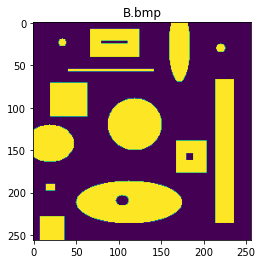

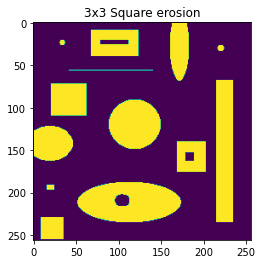

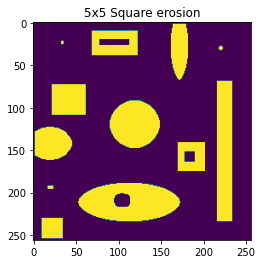

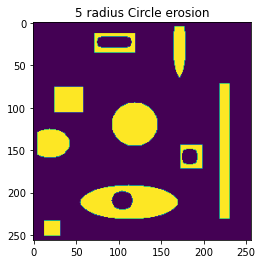

In [4]:
# Erosion

plt.figure(1)
plt.imshow(B)
plt.title("B.bmp")

B_square3_erode = binary_erosion(B, structure=square3)
plt.figure(2)
plt.imshow(B_square3_erode)
plt.title("3x3 Square erosion")

B_square5_erode = binary_erosion(B, structure=square5)
plt.figure(3)
plt.imshow(B_square5_erode)
plt.title("5x5 Square erosion")

B_circle5_erode = binary_erosion(B, structure=circle5)
plt.figure(4)
plt.imshow(B_circle5_erode)
plt.title("5 radius Circle erosion")

Text(0.5, 1.0, '5 radius Circle dilation')

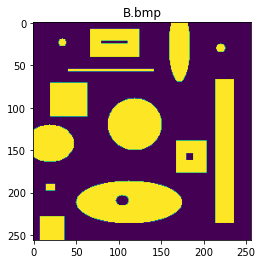

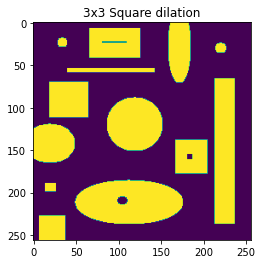

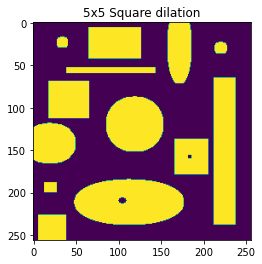

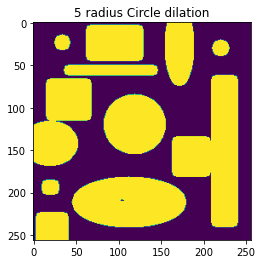

In [5]:
# Dilation

plt.figure(1)
plt.imshow(B)
plt.title("B.bmp")

B_square3_dilate = binary_dilation(B, structure=square3)
plt.figure(2)
plt.imshow(B_square3_dilate)
plt.title("3x3 Square dilation")

B_square5_dilate = binary_dilation(B, structure=square5)
plt.figure(3)
plt.imshow(B_square5_dilate)
plt.title("5x5 Square dilation")

B_circle5_dilate = binary_dilation(B, structure=circle5)
plt.figure(4)
plt.imshow(B_circle5_dilate)
plt.title("5 radius Circle dilation")

Text(0.5, 1.0, '5 radius Circle opening')

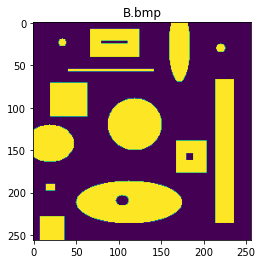

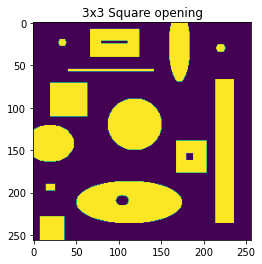

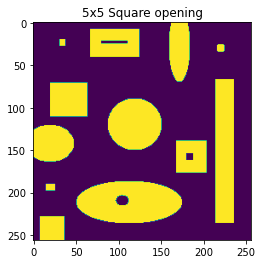

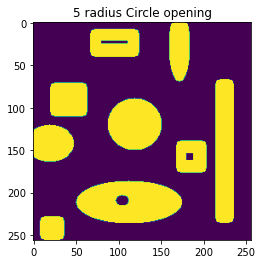

In [6]:
# Opening

plt.figure(1)
plt.imshow(B)
plt.title("B.bmp")

B_square3_open = binary_opening(B, structure=square3)
plt.figure(2)
plt.imshow(B_square3_open)
plt.title("3x3 Square opening")

B_square5_open = binary_opening(B, structure=square5)
plt.figure(3)
plt.imshow(B_square5_open)
plt.title("5x5 Square opening")

B_circle5_open = binary_opening(B, structure=circle5)
plt.figure(4)
plt.imshow(B_circle5_open)
plt.title("5 radius Circle opening")

Text(0.5, 1.0, '5 radius Circle closing')

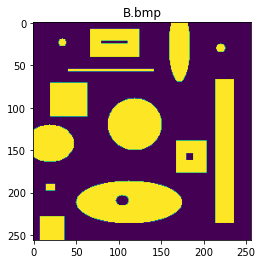

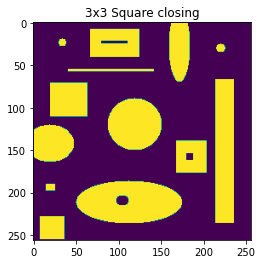

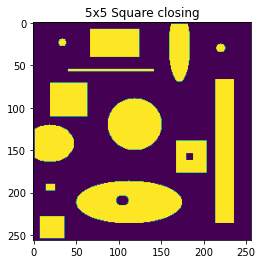

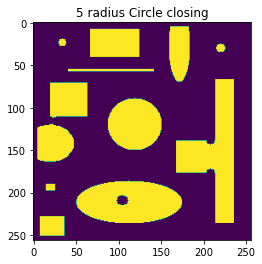

In [7]:
# Closing

plt.figure(1)
plt.imshow(B)
plt.title("B.bmp")

B_square3_close = binary_closing(B, structure=square3)
plt.figure(2)
plt.imshow(B_square3_close)
plt.title("3x3 Square closing")

B_square5_close = binary_closing(B, structure=square5)
plt.figure(3)
plt.imshow(B_square5_close)
plt.title("5x5 Square closing")

B_circle5_close = binary_closing(B, structure=circle5)
plt.figure(4)
plt.imshow(B_circle5_close)
plt.title("5 radius Circle closing")

In [8]:
# Morphological Reconstruction

def rec(image, mask):
    M = np.minimum(image, mask)
    
    area = ndimage.measurements.sum(M)
    s = 0
    
    se = np.array([
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ])
    
    while area != s:
        s = area
        M = np.minimum(image, binary_dilation(M,structure=se))
        area = ndimage.measurements.sum(M)
        
    return M

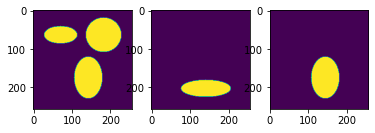

In [9]:
A = imread('A.bmp')
A = A > 100

M = imread('M.bmp')
M = M > 100

AM = rec(A,M)
plt.subplot(1,3,1)
plt.imshow(A)
plt.subplot(1,3,2)
plt.imshow(M)
plt.subplot(1,3,3)
plt.imshow(AM)
plt.show()

In [10]:
def remove_borders(A):
    m, n = A.shape
    
    M = np.zeros((m,n))
    
    # putting 1s in the border
    
    M[0,:] = 1
    M[m-1,:] = 1
    M[:,0] = 1
    M[:,n-1] = 1
    
    M = rec(A,M)
    
    return A^M

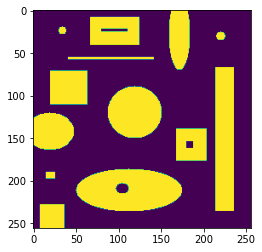

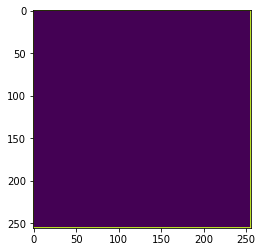

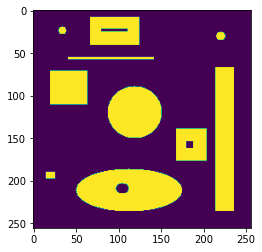

In [11]:
plt.figure(1)
plt.imshow(B)

m,n = B.shape
M = np.zeros((m,n))    
M[0,:] = 1
M[m-1,:] = 1
M[:,0] = 1
M[:,n-1] = 1


plt.figure(2)
plt.imshow(M)

plt.figure(3)
no_borders = remove_borders(B)
plt.imshow(no_borders)

In [12]:
def remove_small(A, n):
    # remove objects smaller than n, uses a SE that's nxn
    
    se = np.ones((n,n))
    M = binary_erosion(A, structure=se)
    return rec(A, M)

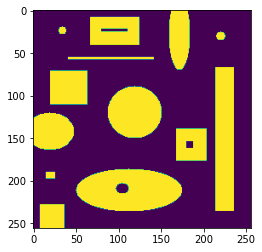

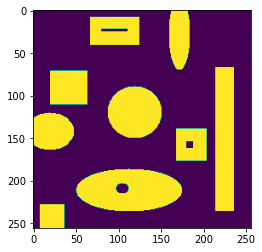

In [52]:
plt.figure(1)
plt.imshow(B)

plt.figure(2)
no_small = remove_small(B,10)
plt.imshow(no_small)

In [53]:
def close_holes(A):
    
    Ac = ~A
    
    m,n = A.shape
    M = np.zeros((m,n))
    M[0,:] = 1
    M[m-1,:] = 1
    M[:,0] = 1
    M[:,n-1] = 1
    
    M = rec(Ac, M)
    
    return ~M    

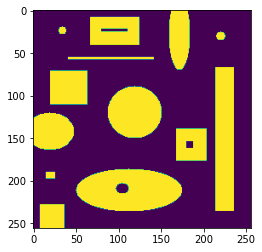

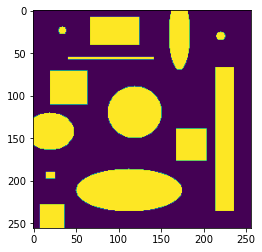

In [54]:
plt.figure(1)
plt.imshow(B)

plt.figure(2)
no_hole = close_holes(B)
plt.imshow(no_hole)